In [ ]:
"""https://jawadicecream.streamlit.app"""

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ice-cream-sales-dataset/Ice Cream.csv


In [5]:

# Load the dataset from a CSV file
df = pd.read_csv("/kaggle/input/ice-cream-sales-dataset/Ice Cream.csv")

# Show the first few rows
df.head()


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [7]:
# Step 2: Separate independent (X) and dependent (y) variables
X = df["Temperature"].values.reshape(-1, 1)  # Feature
y = df["Revenue"].values                    # Target


In [8]:
# Step 3: Split dataset into train (80%) and test (20%) sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 4: Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# Step 5: Prepare the decision tree regressor with default parameters
regressor = DecisionTreeRegressor(random_state=42)
# Step 6: Fit the model with training data
regressor.fit(X_train, y_train)
# Step 7: Predict with the test dataset
y_pred = regressor.predict(X_test)

# Print predictions vs actual
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {pred}")


Actual: 660, Predicted: 699.5
Actual: 624, Predicted: 627.25
Actual: 560, Predicted: 573.6666666666666
Actual: 498, Predicted: 527.0
Actual: 628, Predicted: 613.0
Actual: 301, Predicted: 279.0
Actual: 279, Predicted: 291.5
Actual: 320, Predicted: 286.3333333333333
Actual: 484, Predicted: 534.0
Actual: 684, Predicted: 699.5
Actual: 738, Predicted: 734.0
Actual: 402, Predicted: 415.0
Actual: 442, Predicted: 414.0
Actual: 655, Predicted: 688.5
Actual: 33, Predicted: 10.0
Actual: 222, Predicted: 220.5
Actual: 525, Predicted: 543.5
Actual: 529, Predicted: 587.0
Actual: 588, Predicted: 569.5
Actual: 644, Predicted: 699.5
Actual: 585, Predicted: 524.0
Actual: 810, Predicted: 757.0
Actual: 608, Predicted: 674.3333333333334
Actual: 597, Predicted: 543.0
Actual: 919, Predicted: 927.0
Actual: 637, Predicted: 666.0
Actual: 307, Predicted: 286.3333333333333
Actual: 613, Predicted: 627.25
Actual: 712, Predicted: 774.0
Actual: 685, Predicted: 691.0
Actual: 454, Predicted: 474.0
Actual: 417, Predicted

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R² Score for Decision Tree
r2_tree = r2_score(y_test, y_pred)
mae_tree = mean_absolute_error(y_test, y_pred)
mse_tree = mean_squared_error(y_test, y_pred)

print("Decision Tree Regressor Metrics:")
print(f"R² Score (Accuracy): {r2_tree:.2f}")
print(f"Mean Absolute Error: {mae_tree:.2f}")
print(f"Mean Squared Error: {mse_tree:.2f}")
# Using the built-in score() method
accuracy = regressor.score(X_test, y_test)
print(f"Decision Tree R² Score (Accuracy): {accuracy:.2f}")


Decision Tree Regressor Metrics:
R² Score (Accuracy): 0.96
Mean Absolute Error: 25.86
Mean Squared Error: 1111.91
Decision Tree R² Score (Accuracy): 0.96


/tmp/ipykernel_47/2485756791.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


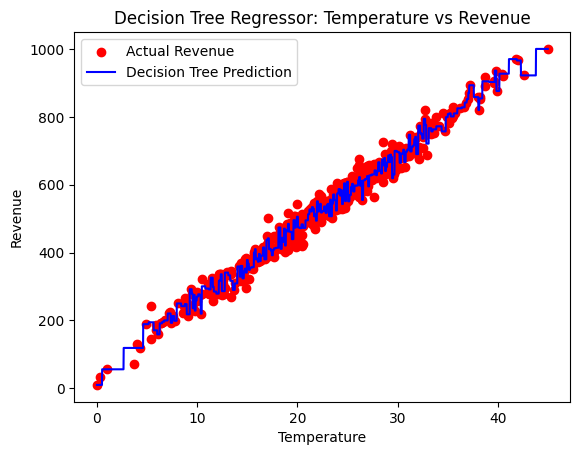

In [11]:
# Step 8: Plot the Decision Tree Regressor results
import matplotlib.pyplot as plt
import numpy as np

# High-resolution X values for smooth prediction curve
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)

plt.scatter(X, y, color='red', label='Actual Revenue')
plt.plot(X_grid, regressor.predict(X_grid), color='blue', label='Decision Tree Prediction')
plt.title("Decision Tree Regressor: Temperature vs Revenue")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.legend()
plt.show()


/tmp/ipykernel_47/3972659463.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


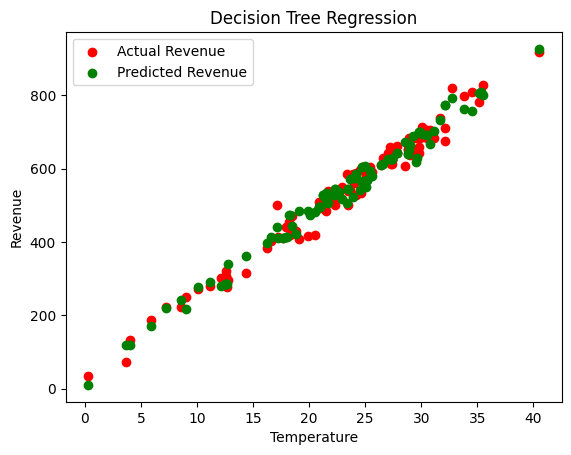

In [12]:
import matplotlib.pyplot as plt

# Create high-resolution X values for smooth plot
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Plot actual vs predicted
plt.scatter(X_test, y_test, color='red', label='Actual Revenue')
plt.scatter(X_test, y_pred, color='green', label='Predicted Revenue')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [13]:
import joblib
joblib.dump(regressor, "tmodel.pkl")
print("Model saved as tmodel.pkl")
loaded_model = joblib.load("tmodel.pkl")

# Step 2: Define new temperature values to test
new_temperatures = np.array([15, 22, 28, 35]).reshape(-1, 1)

# Step 3: Predict revenue for these temperatures
predicted_revenue = loaded_model.predict(new_temperatures)

# Step 4: Display results
for temp, revenue in zip(new_temperatures.flatten(), predicted_revenue):
    print(f"Temperature: {temp}°C --> Predicted Revenue: {revenue}")


Model saved as tmodel.pkl
Temperature: 15°C --> Predicted Revenue: 378.0
Temperature: 22°C --> Predicted Revenue: 551.0
Temperature: 28°C --> Predicted Revenue: 639.0
Temperature: 35°C --> Predicted Revenue: 799.0


In [3]:
import sklearn
print(sklearn.__version__)


1.4.2


In [2]:
!pip install scikit-learn==1.4.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 102.2 MB/s eta 0:00:0000:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
